### Deliverable 3: Optimizing the Neural Network Model


**###### First Optimization Test ######** 
---
Drop "SPECIAL_CONSIDERATIONS" and "STATUS" columns - they are binary

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
url = "https://drive.google.com/file/d/1xRlZqRGPecTUmGXoGHwbzsEFra8-0YLk/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
application_df_orig = pd.read_csv(url)
application_df_orig.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
### First change: Drop SPECIAL_CONSIDERATIONS and STATUS since they are binary
application_df1 = application_df_orig.drop(columns=["EIN", "NAME", "SPECIAL_CONSIDERATIONS", "STATUS"])
application_df1.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
count_unique = application_df1.nunique(axis=0)

print(f"Number of unique values in each column:\n {count_unique}")


Number of unique values in each column:
 APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning
count_application_type = application_df1["APPLICATION_TYPE"].value_counts()

print(f"Total count of each application type:\n {count_application_type}")


Total count of each application type:
 T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


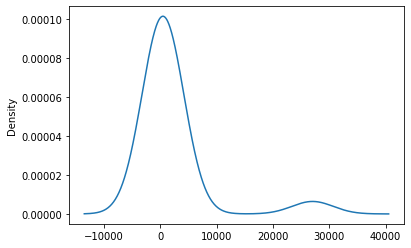

In [5]:
# Visualize the value counts of APPLICATION_TYPE
## How to plot distributions of column values in Pandas: https://www.statology.org/pandas-plot-distribution-of-column/
count_application_type.plot(kind='kde')


In [6]:
# Determine which values to replace if counts are less than ...?
# Choose 500 for the cut off point
replace_application = list(count_application_type[count_application_type < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df1.APPLICATION_TYPE = application_df1.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df1.APPLICATION_TYPE.value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
count_classification = application_df1["CLASSIFICATION"].value_counts()

print(f"Total count of each classification:\n {count_classification}")


Total count of each classification:
 C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


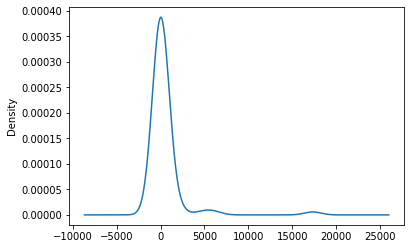

In [8]:
# Visualize the value counts of CLASSIFICATION
count_classification.plot(kind='kde')


In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(count_classification[count_classification < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df1.CLASSIFICATION = application_df1.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df1.CLASSIFICATION.value_counts()


C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df1.dtypes[application_df1.dtypes == "object"].index.tolist()
application_cat


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df1[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df1 = application_df1.merge(encode_df,left_index=True, right_index=True)
application_df1 = application_df1.drop(application_cat,1)
application_df1.head()


<ipython-input-12-52b223bcb264>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df1 = application_df1.drop(application_cat,1)


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y1 = application_df1["IS_SUCCESSFUL"].values
X1 = application_df1.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=42)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled1 = X_scaler.transform(X_train)
X_test_scaled1 = X_scaler.transform(X_test)


In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled1[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 5


nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, 
                             input_dim=number_input_features, 
                             activation="relu")
)

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
## Sigmoid is slightly more in-depth than RELU, which makes it a good model to output with
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [17]:
# Create a callback that saves weights every 5 Epochs
# import dependency 
import os

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create the callback variable
mc = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')


# Train the model
fit_model = nn1.fit(X_train,y_train,epochs=25, callbacks = [mc])


Epoch 1/25
796/804 [============================>.] - ETA: 0s - loss: 6156.7109 - accuracy: 0.4989
Epoch 1: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 10s 9ms/step - loss: 6096.4028 - accuracy: 0.4993
Epoch 2/25
795/804 [============================>.] - ETA: 0s - loss: 0.6930 - accuracy: 0.5318
Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6930 - accuracy: 0.5318
Epoch 3/25
790/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5320
Epoch 3: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6916 - accuracy: 0.5318
Epoch 4/25
797/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 5/25
777/804 [=====================

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled1,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 1s - loss: 0.7671 - accuracy: 0.5131 - 561ms/epoch - 2ms/step
Loss: 0.7670705914497375, Accuracy: 0.5131195187568665


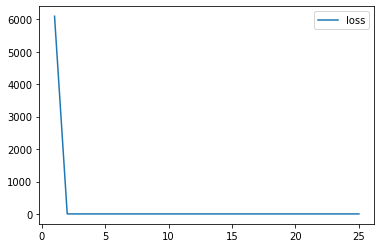

In [19]:
# Create a DataFrame containing training history
history_df1 = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df1.plot(y="loss")

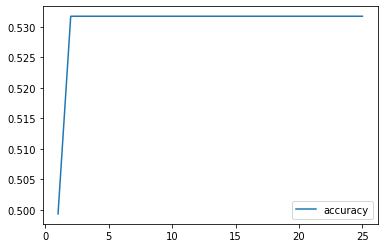

In [20]:
# Plot the accuracy
history_df1.plot(y="accuracy")

In [21]:
# Export our model to HDF5 file
nn1.save("trained_application1.h5")


In [22]:
# Google Collab
from google.colab import files
files.download("trained_application1.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>